<a href="https://colab.research.google.com/github/sjekic/DigitRecognizer/blob/main/DigitRecognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Custom Digit Recognizer

## Import Libraries

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

## Data preparation

(1530, 3026)


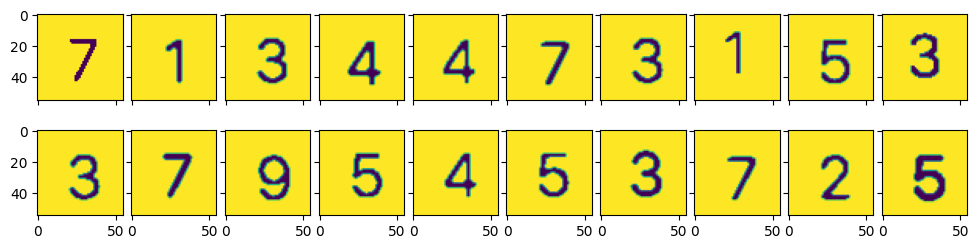

In [29]:
df = pd.read_csv("dataset_train.csv")
print(df.shape)

fig, ax = plt.subplots(2,10, figsize=(12, 3), sharex=True, sharey=True)
img_idx = np.random.choice(df.shape[0], 2*10)
for i, ax in enumerate(ax.flatten()):
    img = Image.fromarray(df.iloc[img_idx[i], :-1].values.reshape(55,-1).astype('uint8'))
    ax.imshow(img) # or ax.imshow(img, cmap='gray_r')

plt.subplots_adjust(hspace=0, wspace=0.1)

Based on the above provided code (and the additional code snippet `print(df.shape)` we can conclude that the dataset has 1539 images of dimensions 55x55 (which equals to 3025, as the second element of the shape tells us). The reason why when printing shape the second element is 3026 and not 3025 is because the last column is the true label.

After running the code snippet several times, we noticed almost all of the images are normal and show only one digit with a few exceptions of fully purple images (which are actually blank). We will treat them as noise. What makes them different from the normal images is that all of their pixels are identical in colour, hence we will try to identify them by that characteristic.

In [30]:
import numpy as np

pixels = df.iloc[:, :-1]

exceptions = (pixels.nunique(axis=1) == 1)

print(f"Blank images found: {exceptions.sum()}")

blank_indices = df[exceptions].index


Blank images found: 24


In our entire dataset there are 24 blank images which we will remove.

In [31]:
df_cleaned = df[~exceptions].reset_index(drop=True)
print(df_cleaned.shape)

(1506, 3026)


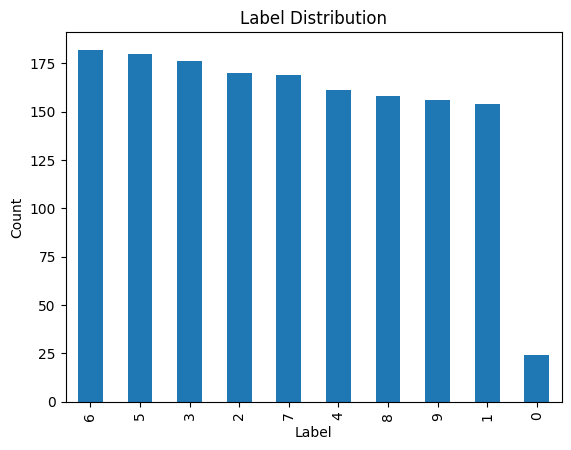

In [32]:
df.iloc[:, -1].value_counts().plot(kind='bar')
plt.title("Label Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

When running the code snippet that visualizes the numbers, we didn't see any zeros, however when looking at the distribution of labels there were approximately 25 '0' labels. This could potentially be missing values instead that after analysis we will decide whether to drop or impute.